# Part 2

## Importing data

In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib

In [2]:
file_name_x = "DATA/x_M5_N400.csv"
file_name_y = "DATA/y_M5_N400.csv"

x = np.loadtxt(file_name_x,dtype="int", delimiter=" ")
y = np.loadtxt(file_name_y,dtype="int", delimiter=" ")

## t-SNE algorithm

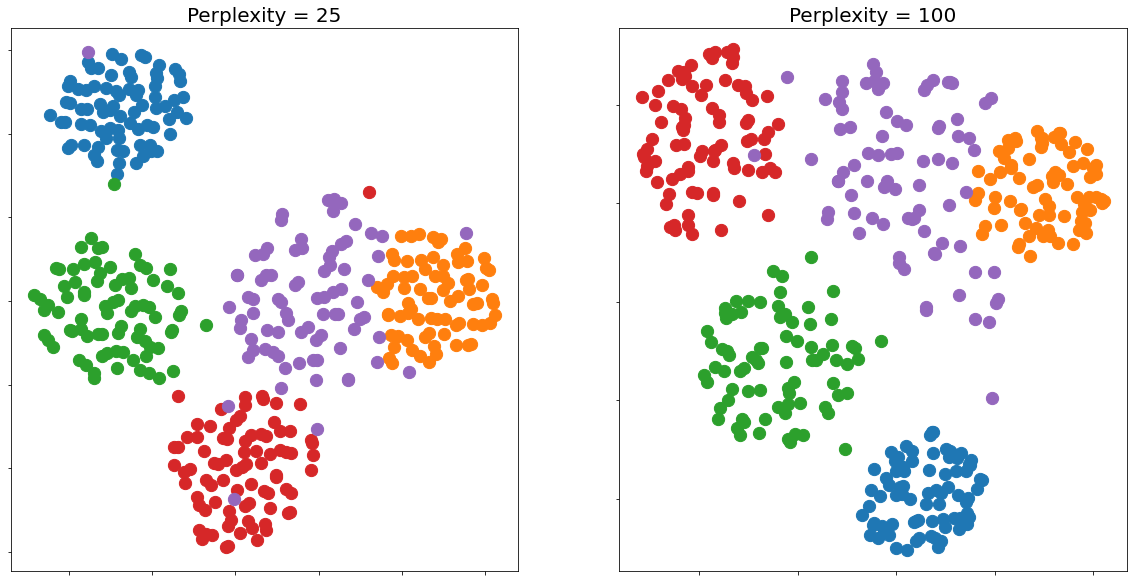

In [5]:
perplexities = [25, 100]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
for i in range(2) :
    x_embedded = TSNE(n_components=2, perplexity=perplexities[i], random_state=1234).fit_transform(x)
    for j in range(5):
        ax[i].scatter(x_embedded[:,0][np.where(y==j)],x_embedded[:,1][np.where(y==j)], s=150);
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].axis("equal");
    ax[i].set_title(f"Perplexity = {perplexities[i]}", fontsize=20)

In [6]:
# our choice of perplexity for tsne
x_emb = TSNE(n_components=2, perplexity=25, random_state=1234).fit_transform(x)

In [7]:
x_emb.shape

(400, 2)

We see that changing the perplexity value the points preserve the main clustering pettern but they rotate.

## Distances between each pair of clusters

From the patterns of the generation of samples we see that certain labels, y, are assigned when particular conditions happens in the data. Those conditions concern the presence or not in the sample of a determined list of numbers. We see that only for the labels 1 and 4 there are 4 common numbers in the sequence of the patterns that make the samples belonging to $y=1$ and $y=4$ similar in terms of distance of clusters. Indeed we will see that the minimum distance of points between clusters is achieved between group 1 and 4. 

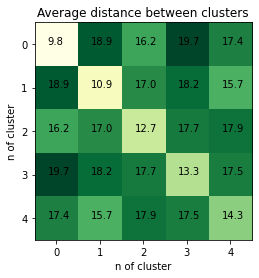

In [32]:
dis_matrix = np.zeros((5,5))

for i in range(5):
    for j in range(5):
        distance = []
        for k in x[np.where(y==i)]: 
            for z in x[np.where(y==j)]: 
                distances = np.sum(np.abs(z-k))
                distance.append(distances)

        dis_matrix[i,j] = np.mean(distance)
        
plt.imshow(dis_matrix, cmap = 'YlGn')
plt.title('Average distance between clusters')
plt.xlabel('n of cluster')
plt.ylabel('n of cluster')
plt.xticks(range(0,5))
plt.yticks(range(0,5))

for i in range(5):
    for j in range(5):
        plt.text(i-0.2,j, round(dis_matrix[i,j],1))

How we can see from the matrix above, the average distance between points of label 4 from from points of label 1, computed in the original 36 dimention, is the minimum distance between couples of labeled points. For this reason the points embedded from the t-SNE algorithm are close betweem them.

# DBSCAN algorithm

## Visualizing minimum distances

In [14]:
distance = []

for i in range(len(x)): 
    all_x = list(x)
    del all_x[i]
    distances = np.sum(np.abs(all_x-np.array(x[i])), axis=1)
    distance.append(np.min(distances))

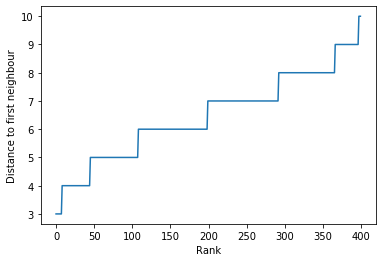

In [73]:
plt.plot(np.sort(distance));
plt.xlabel('Rank');
plt.ylabel('Distance to first neighbour');

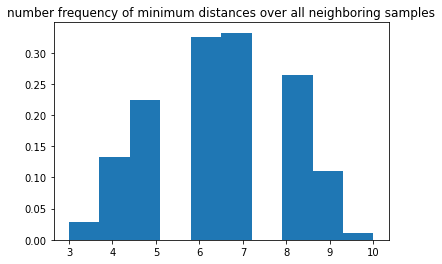

In [13]:
plt.hist(distance, density=True);
plt.title('number frequency of minimum distances over all neighboring samples');

Representing the different minimum distances of each point from its nearest neighbor we notice that:

-in the first plot, suggested to solve the noebook, the width of each step represents the number of points that achieve the same distance from their neighbors. The adviced choice of $\epsilon$ for DBSCAN would be roughly the value correspondant to the larger step. 

-in the second plot we see directly the median of the histogram takes the place of the width of the step of the previous picture;

what we expect for a good $\epsilon$ therefore is $\approx$ 7.

## Clustering with DBSCAN in 36 dimensions

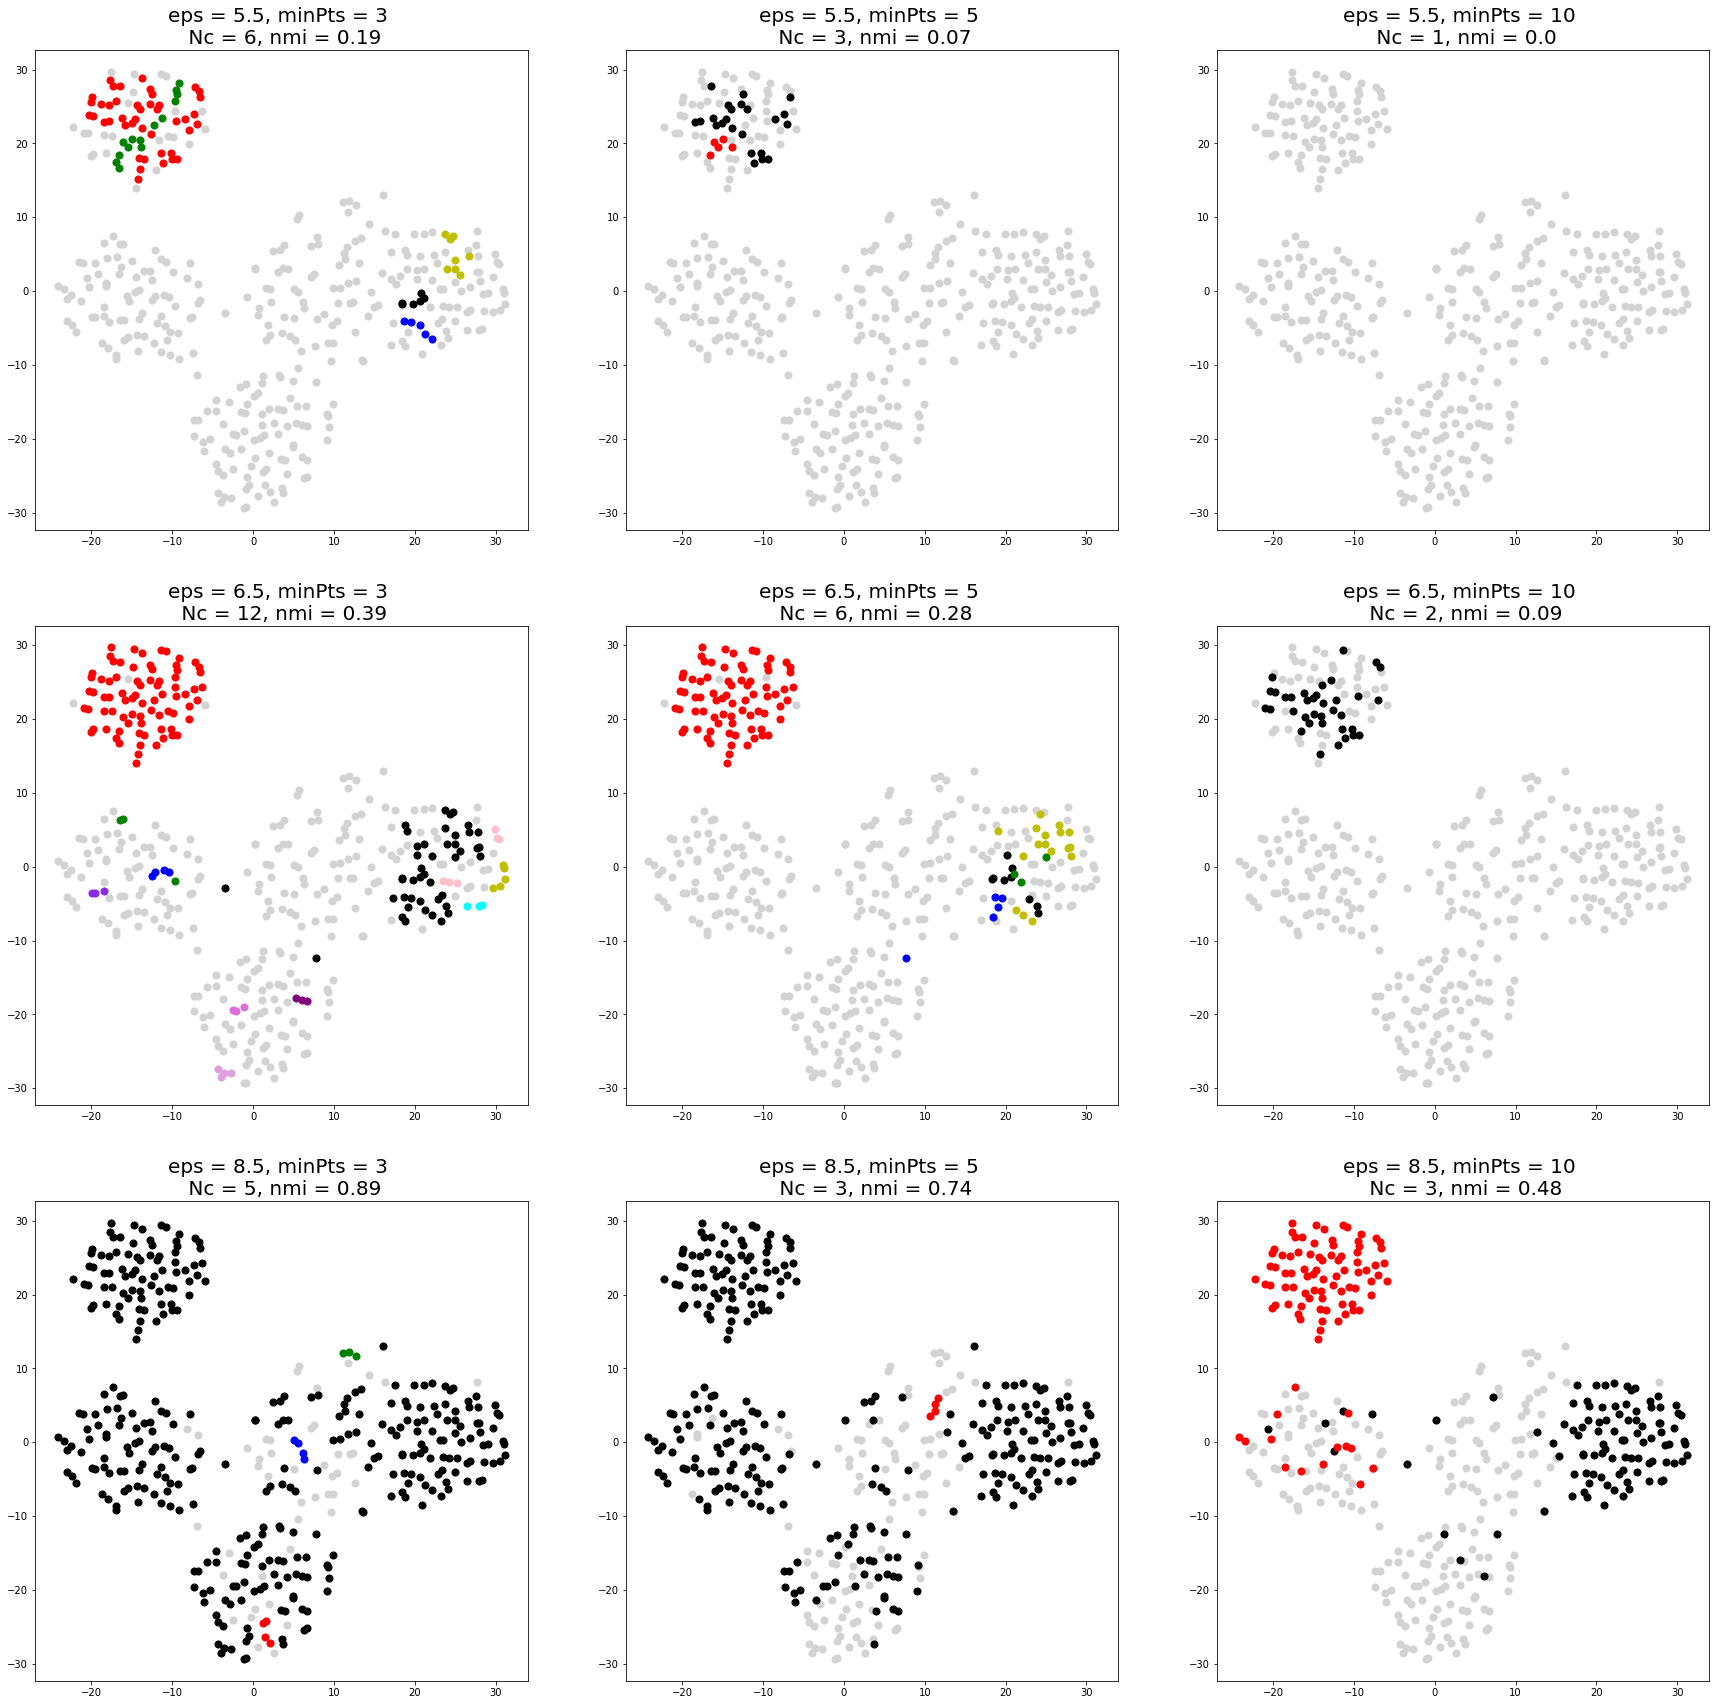

In [15]:
epsilon = [5.5,6.5,8.5]
# we decide to compare different values around 7, the cutoff one found before
minsample = [3, 5, 10]
mycol=['lightgray','k','r','g','b','y','orchid','pink','plum','cyan','blueviolet','purple']

fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(30,30))
for i in range(len(epsilon)):
    for j in range(len(minsample)):
        db = DBSCAN(eps=epsilon[i], min_samples=minsample[j], metric = 'l1').fit(x)
        y_predict = db.fit_predict(x)
        y_values = np.unique(y_predict)
        nmi = np.round(1 - (y_predict == -1).sum()/len(y_predict),2)
        for k in range(len(y_values)):
            ax[i,j].scatter(x_emb[:,0][np.where(y_predict == y_values[k])], x_emb[:,1][np.where(y_predict == y_values[k])], c=mycol[k], s=50)
            ax[i,j].set_title(f"eps = {epsilon[i]}, minPts = {minsample[j]} \n Nc = {len(y_values)}, nmi = {nmi}", fontsize = 20)

### What is going on?

We first used the x_embedded samples in two dimensions to represent the clusters obtained through DBSCAN algorithm in instead 36 dimensions. We see that performances of DBSCAN in high dimensional feature space, here 36, are not optimal since the number of clusters recognized varying the parameters doesn't correspond to the already known labelled ones. 
While in DBSCAN we don't see a satisfying distribution of clusters in t-SNE the algorithm works differently.

Indeed when we first reduce dimensionality and only then apply DBSCAN clustering results are better. t-SNE infact performs a comparison between distances of points in feature space such that points that are far away from them are made even more distant while the ones close to each other are made closer.

We therefore think that the reason why DBSCAN doesn't work is the metric used, DBSCAN in two dimensions after dimensionality reduction (t-SNE) is indeed like exploiting the properties of a different new metrics that in this case works better.

### DBSCAN in 2D space

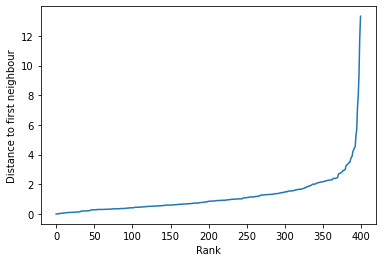

In [17]:
# distance in the 2D space

distance_2d = []

for i in range(len(x_emb)): 
    all_x = list(x_emb)
    del all_x[i]
    distances = np.sum((all_x-np.array(x_emb[i]))**2, axis=1)
    distance_2d.append(np.min(distances))
    
plt.plot(np.sort(distance_2d));
plt.xlabel('Rank');
plt.ylabel('Distance to first neighbour');

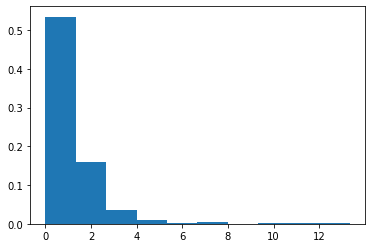

In [21]:
plt.hist(distance_2d, density=True);

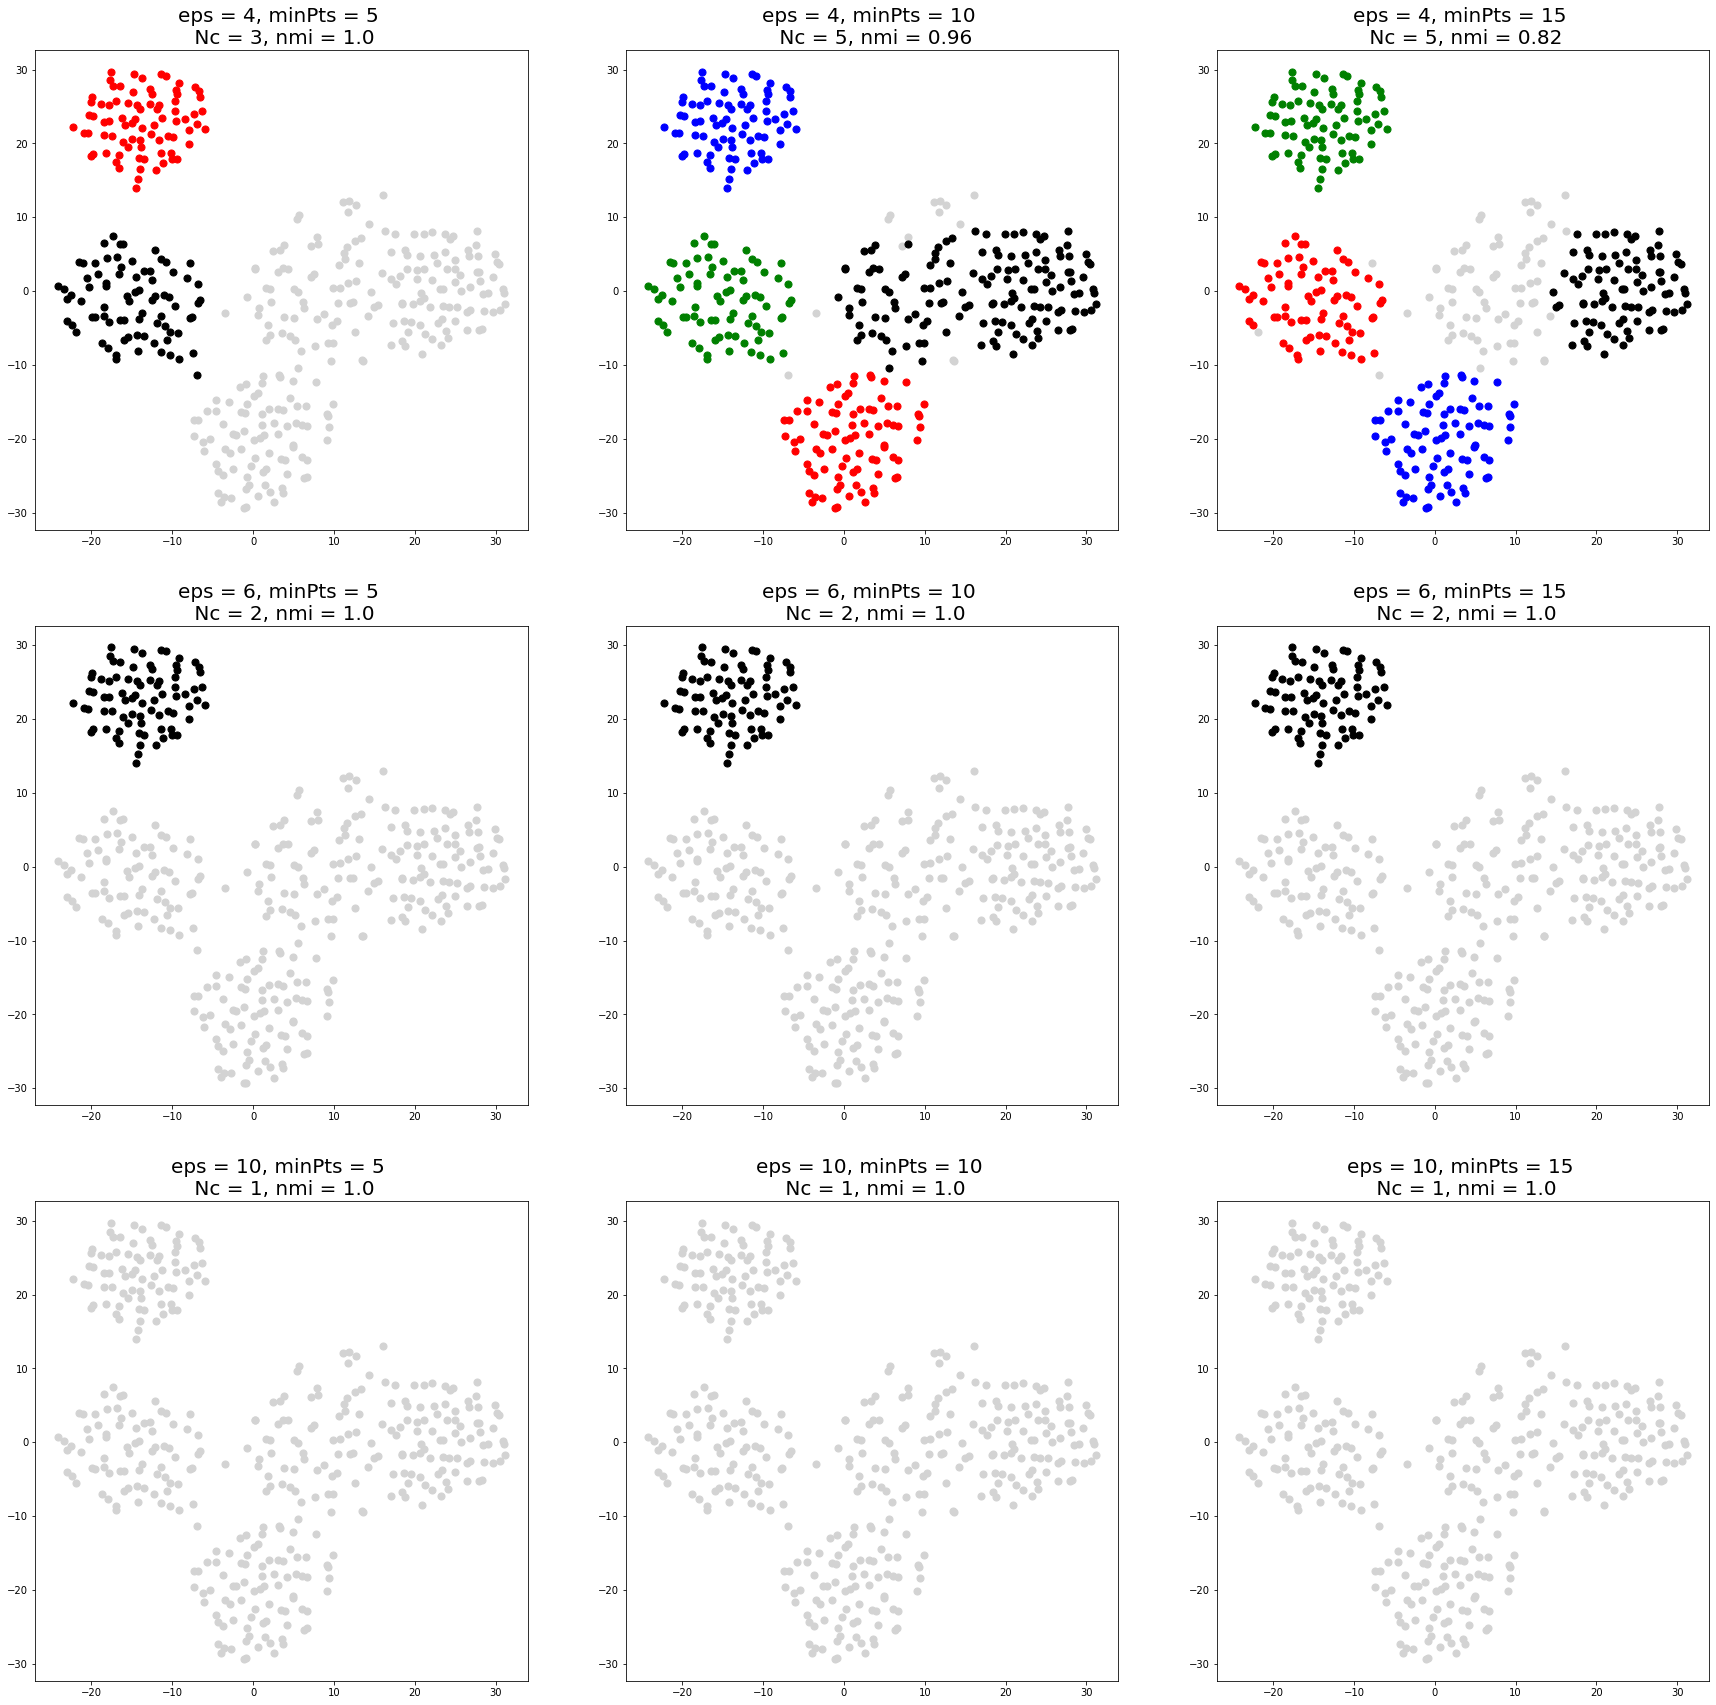

In [25]:
epsilon = [4, 6, 10]
# we choose instead of the suggested 1-2 a bigger value to ensure a reasonable number of points in each cluster
minsample = [5, 10, 15]
mycol=['lightgray','k','r','g','b','y','orchid','pink','plum','cyan','blueviolet','purple']

fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(30,30))
for i in range(len(epsilon)):
    for j in range(len(minsample)):
        db = DBSCAN(eps=epsilon[i], min_samples=minsample[j], metric = 'l2').fit(x_emb)
        y_predict = db.fit_predict(x_emb)
        y_values = np.unique(y_predict)
        nmi = np.round(1 - (y_predict == -1).sum()/len(y_predict),2)
        for k in range(len(y_values)):
            ax[i,j].scatter(x_emb[:,0][np.where(y_predict == y_values[k])], x_emb[:,1][np.where(y_predict == y_values[k])], c=mycol[k], s=50)
            ax[i,j].set_title(f"eps = {epsilon[i]}, minPts = {minsample[j]} \n Nc = {len(y_values)}, nmi = {nmi}", fontsize = 20)

We notice that for large epsilon DBSCAN groups points in a single big cluster where the minimum number of points parameter does not influence its choice.


As we were expecting in the previous section of the notebook, visualizing the data in 2D they are more easily grouped in clusters and so we found a set of parameters that properly let the algorithm classify the data. 